#  LU3MA201 : Projet / Travail d’étude et de recherche

<!-- dom:AUTHOR: Aya Bouzidi at [Sorbonne Université](http://www.sorbonne-universite.fr/), -->
<!-- Author: -->  
**Aya Bouzidi** ( L3 de Mathématiques à [Sorbonne Université](http://www.sorbonne-universite.fr/) ).

Sous la direction de : **Fréderic Nataf** ( Directeur de recherche au [Laboratoire J.L. Lions](https://www.ljll.math.upmc.fr/), [Sorbonne Université](http://www.sorbonne-universite.fr/) )

Licence <a href="https://creativecommons.org/licenses/by-nc-nd/4.0/">CC BY-NC-ND</a>

# 2  Reconnaissance de chiﬀres manuscrits par la SVD

In [7]:
import scipy.io as spi
import numpy as np
import matplotlib.pyplot as plt

mat=spi.loadmat("base_apprentissage.mat")
data_app=np.transpose(mat['data'])
label_app=np.array(mat['label'])[0] #label: chiffre numérisé
label_app=label_app.astype(int) #Les labels sont stockés en flottants, on les convertit en entiers

mat = spi.loadmat("base_test.mat")
data_test = np.transpose(mat['data'])
label_test = np.array(mat['label'])[0]
label_test =label_test.astype(int)

<div id="ch:method_1"></div>

**Notre deuxième programme de classification est basé sur l'algorithme suivant:**
Pour chaque chiffre $i$, on concaténe les vecteurs représentant $i$ dans une grande matrice $D_i$.

In [8]:
l_app=len(data_app)
l_test=len(data_test)
D_0=np.hstack([data_app[i].reshape(-1,1) for i in range(l_app) if label_app[i]==0])
D_1=np.hstack([data_app[i].reshape(-1,1) for i in range(l_app) if label_app[i]==1])
D_2=np.hstack([data_app[i].reshape(-1,1) for i in range(l_app) if label_app[i]==2])
D_3=np.hstack([data_app[i].reshape(-1,1) for i in range(l_app) if label_app[i]==3])
D_4=np.hstack([data_app[i].reshape(-1,1) for i in range(l_app) if label_app[i]==4])
D_5=np.hstack([data_app[i].reshape(-1,1) for i in range(l_app) if label_app[i]==5])
D_6=np.hstack([data_app[i].reshape(-1,1) for i in range(l_app) if label_app[i]==6])
D_7=np.hstack([data_app[i].reshape(-1,1) for i in range(l_app) if label_app[i]==7])
D_8=np.hstack([data_app[i].reshape(-1,1) for i in range(l_app) if label_app[i]==8])
D_9=np.hstack([data_app[i].reshape(-1,1) for i in range(l_app) if label_app[i]==9])

<div id="method_1"></div>
Soit la **SVD** pour $D_i$:   $D_i=U_i \Sigma_i V_i^{t}$. Pour chaque $i \in[0,9]$, on calcule $U_i$.


In [9]:
U_0=np.linalg.svd(D_0)[0]
U_1=np.linalg.svd(D_1)[0]
U_2=np.linalg.svd(D_2)[0]
U_3=np.linalg.svd(D_3)[0]
U_4=np.linalg.svd(D_4)[0]
U_5=np.linalg.svd(D_5)[0]
U_6=np.linalg.svd(D_6)[0]
U_7=np.linalg.svd(D_7)[0]
U_8=np.linalg.svd(D_8)[0]
U_9=np.linalg.svd(D_9)[0]

In [10]:
U=[U_0,U_1,U_2,U_3,U_4,U_5,U_6,U_7,U_8,U_9]

<div id="method_1"></div>
Pour un vecteur $v$ de la base de test et pour $i \in [0.9]$, on calcule le résidu relatif $r_{i,v}=\frac{1}{||v||_2}||v-U_{i,k}U_{i,k}^tv||_2$ pour $k=10$. On classifie le $v$ au chiffre $i$ qui minimise le résidu $r_{i,v}$.

In [11]:
def estim(v):
    résidus=[np.linalg.norm(v-U[i][:,:10]@(np.transpose(U[i][:,:10])@v))/np.linalg.norm(v) for i in range(10)] 
    return résidus.index(min(résidus)) 

<div id="method_1"></div>
Estimation du pourcentage de prédictions correctes pour chaque chiffre.

In [12]:
def precis(j):
    list_d=[data_test[k] for k in range(l_test) if label_test[k]==j]
    a=len(list_d)
    list_la=[estim(list_d[k]) for k in range(a)]
    return list_la.count(j)/a 

In [ ]:
Précisions=[precis(j) for j in range(10)]
for i in range(10):
    print("précision pour le chiffre", i ,"est de" , Précisions[i]*100, "%")
print("précision totale de la SVD est de" , sum(Précisions)*10, "%")

### Histogramme des précisions par chiffre

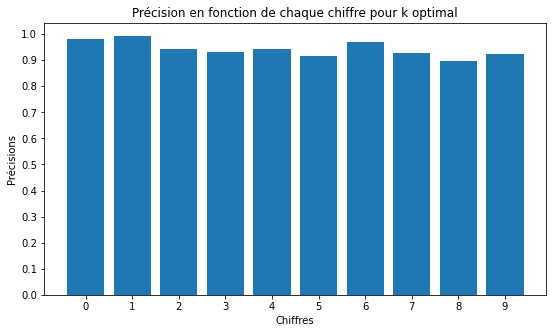

In [16]:
plt.figure(figsize=(9,5))
plt.title('Précision en fonction de chaque chiffre pour k optimal')
x=[i for i in range(10)]
y=[Précisions[i] for i in range(10)]
plt.bar(x, y)
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.xlabel(r'Chiffres')
plt.ylabel(r'Précisions')
plt.show()

Le chiffre 1 a la plus grande précision et 8 la plus petite précision.

### Matrice de confusion

Voyons en quel autre chiffre chaque chiffre a été identifié de manière erronée

In [15]:
#Labels estimés pour les vecteurs de la base de tests et pour une certaine distance:
def estimation_label(data_test,label_test,methode): # renseigner un p quelconque si on n'utilise pas la norme p (par ex p=0)
    k=len(data_test)
    label_estim=np.zeros(k)
        
    for i in range(k):
        label_estim[i]=methode(data_test[i])
        
    return label_estim 

In [16]:
label_estim=estimation_label(data_test,label_test,estim)
wrong_label=label_test[label_estim!=label_test]
wrong_estim=label_estim[label_estim!=label_test]

Trouvons les chiffres mal attribués à chaque chiffre et tracons le graphe représentant leurs pourcentages

In [17]:
wrong_estimations=[]
wrong_labels=[]
for i in range(10):
    j=wrong_estim[wrong_label==i]
    k=wrong_label[wrong_label==i]
    wrong_estimations.append(j)
    wrong_labels.append(k)

Values=[]
Counts=[]
for i in range(10):
    value, count=np.unique(wrong_estimations[i], return_counts=True)
    value=value.tolist()
    count=count.tolist()
    Values.append(value)
    Counts.append(count)
    
pourcentage_chiffre=np.zeros(10)
for j in range(10):
    if j in Values[0]:
        pourcentage_chiffre[j]=Counts[0][Values[0].index(j)]  
Sum=np.sum(pourcentage_chiffre)
for j in range(10):
    pourcentage_chiffre[j]=pourcentage_chiffre[j]/Sum
    
Liste_pourcentage_chiffres=[]
for i in range(10):
    pourcentage_chiffre=np.zeros(10)
    for j in range(10):
        if j in Values[i]:
            pourcentage_chiffre[j]=Counts[i][Values[i].index(j)]  
    Sum=np.sum(pourcentage_chiffre)
    for j in range(10):
        pourcentage_chiffre[j]=pourcentage_chiffre[j]/Sum
    Liste_pourcentage_chiffres.append(pourcentage_chiffre)

### Tracé des histogrammes

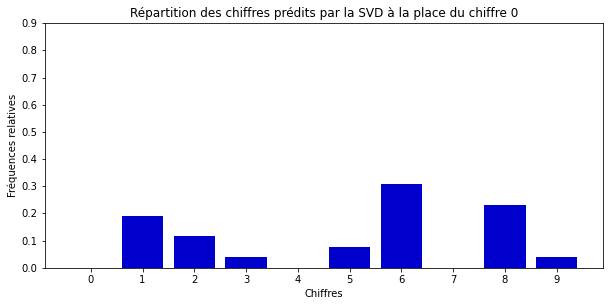

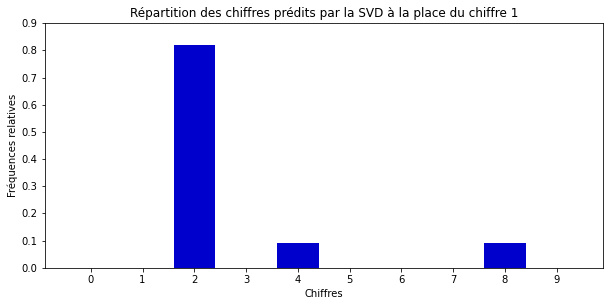

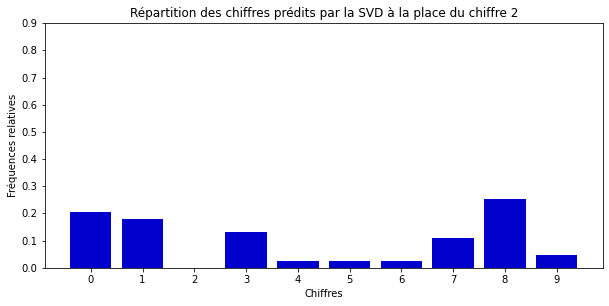

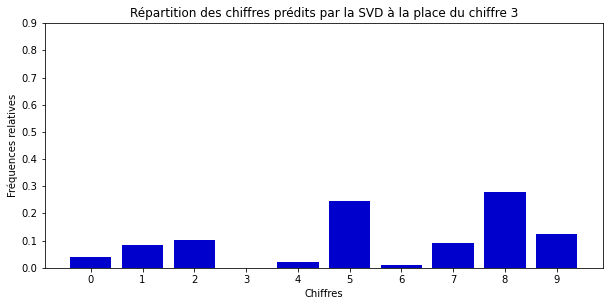

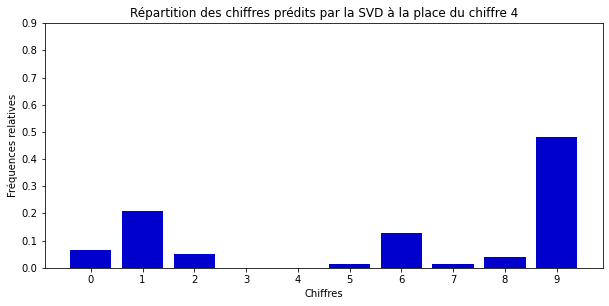

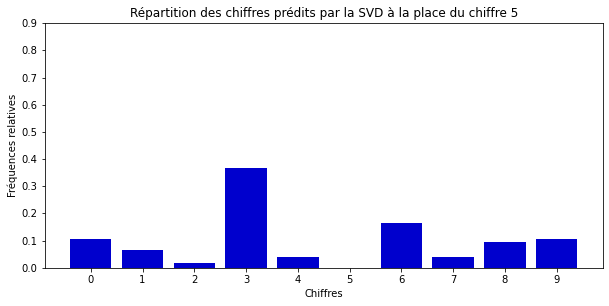

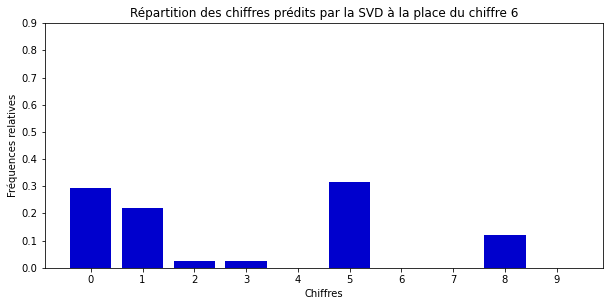

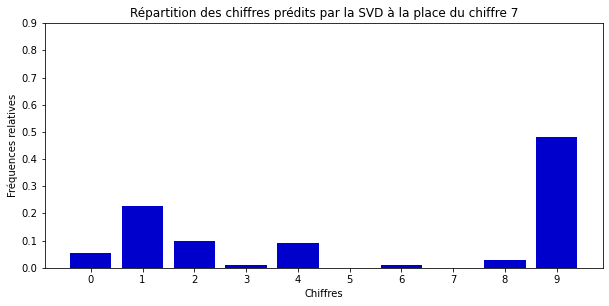

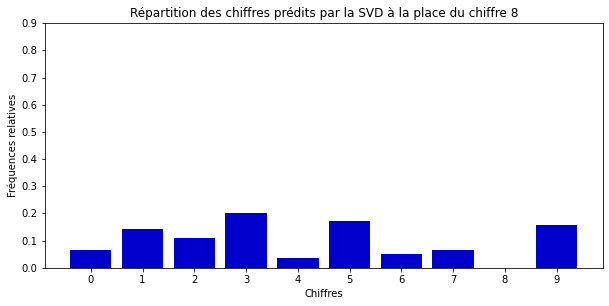

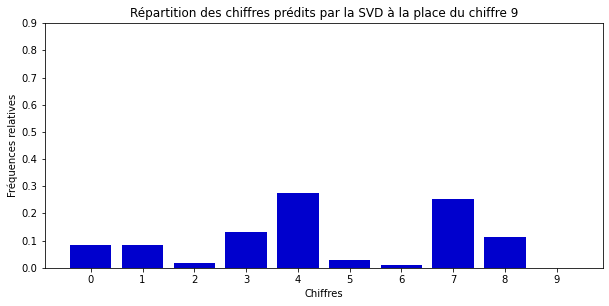

In [27]:
Chiffres=np.arange(0,10,1)

for i in range(10):
    plt.figure(figsize=(10,4.5))
    #str='Répartition des chiffres prédits à la place du chiffre',i
    plt.title('Répartition des chiffres prédits par la SVD à la place du chiffre {}'.format(i))
    plt.bar(Chiffres,Liste_pourcentage_chiffres[i], align='center', color="mediumblue")
    plt.xticks([0,1,2,3,4,5,6,7,8,9])
    plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
    plt.xlabel(r'Chiffres')
    plt.ylabel(r'Fréquences relatives')
    plt.show()